This is an example of developing a script locally with the West Nile Virus data to share on Kaggle
Once you have a script you're ready to share, paste your code into a [new script](https://www.kaggle.com/c/predict-west-nile-virus/scripts/new).

In [10]:
# For working locally, you want to be in west_nile_scripts/working. 
# This command will move you to there, if you're in west_nile_scripts/src (where this file is).
!cd ../working/ # Not necessary for scripts running on Kaggle

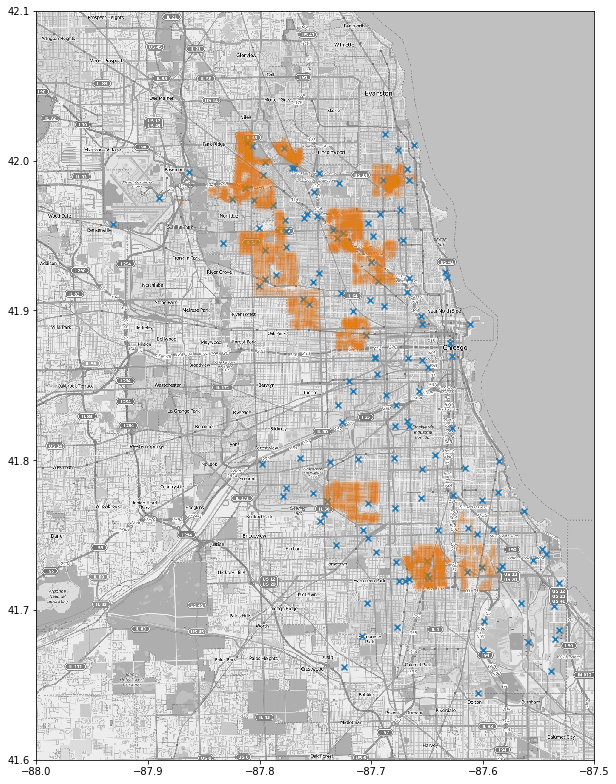

In [33]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('./assets/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

spray=pd.read_csv('./assets/spray.csv')
spray_locations = spray[['Longitude', 'Latitude']].drop_duplicates()

spray_location_mask=((spray_locations['Longitude']>-88)&(spray_locations['Longitude']<-87.5)&(spray_locations['Latitude']>41.6)&
(spray_locations['Latitude']<42.1))

spray_locations=spray_locations.loc[spray_location_mask].values

plt.scatter(spray_locations[:,0], spray_locations[:,1], marker='*', alpha=.03)


In [7]:
#plt.savefig('heatmap.png')

In [3]:
mapdata.shape

(1760, 1311)

In [4]:
aspect

1.3424866514111364